In [1]:
import pandas as pd
import numpy as np
from datetime import date, timedelta, datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import log_loss, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (20,3)

In [2]:
class evaluation:
    def __init__(self, true_s):
        self.true_df = pd.DataFrame(true_s)
        self.true_df.columns = ['swell']
        self.true_df['swell(t+1)'] = self.true_df['swell'].shift(-1)
        self.true_df['swell(t+2)'] = self.true_df['swell'].shift(-2)
        self.true_df['swell(t-1)'] = self.true_df['swell'].shift(1)
        self.true_df['swell(t-2)'] = self.true_df['swell'].shift(2)
    
        self.swell_columns = ['swell(t+1)','swell(t+2)','swell(t-1)','swell(t-2)']
    
    def _eval_one(self, pred):
        true = self.true_df.loc[pred.name]
        swell = true['swell'] 
        p_swell = pred['pred']

        if swell == 0 and p_swell == 0:
            return 1

        if swell == 1 and p_swell == 1:
            return 2

        if swell == 0 and p_swell == 1:
            if (true[self.swell_columns].values == 1).any():
                return 0
            else:
                return -1

        if swell == 1 and p_swell == 0:
            if (pred[self.swell_columns].values == 1).any():
                return 0
            else: 
                return -2
    
    def evaluate(self, pred):
        pred_df = pd.DataFrame(pred)
        pred_df.columns = ['pred']
        pred_df['swell(t+1)'] = pred_df['pred'].shift(-1)
        pred_df['swell(t+2)'] = pred_df['pred'].shift(-2)
        pred_df['swell(t-1)'] = pred_df['pred'].shift(1)
        pred_df['swell(t-2)'] = pred_df['pred'].shift(2)

        result = []
        for index in pred_df.index:
            result.append(self._eval_one(pred_df.loc[index]))
        
        #print(result)
        print(pd.Series(result).value_counts())
        
        return np.sum(result)

In [3]:
num_values = 7
degrees_week = np.linspace(0, 360, num_values + 1)[:-1]
print(degrees_week)
sin_week = np.sin(np.deg2rad(degrees_week))
print(sin_week)
cos_week = np.cos(np.deg2rad(degrees_week))
print(cos_week)

num_values = 12
degrees_month = np.linspace(0, 360, num_values + 1)[:-1]
print(degrees_month)
sin_month = np.sin(np.deg2rad(degrees_month))
print(sin_month)
cos_month = np.cos(np.deg2rad(degrees_month))
print(cos_month)

num_values = 31
degrees_day = np.linspace(0, 360, num_values + 1)[:-1]
print(degrees_day)
sin_day = np.sin(np.deg2rad(degrees_day))
print(sin_day)
cos_day = np.cos(np.deg2rad(degrees_day))
print(cos_day)

num_values = 24
degrees_hour = np.linspace(0, 360, num_values + 1)[:-1]
print(degrees_hour)
sin_hour = np.sin(np.deg2rad(degrees_hour))
print(sin_hour)
cos_hour = np.cos(np.deg2rad(degrees_hour))
print(cos_hour)

[   0.           51.42857143  102.85714286  154.28571429  205.71428571
  257.14285714  308.57142857]
[ 0.          0.78183148  0.97492791  0.43388374 -0.43388374 -0.97492791
 -0.78183148]
[ 1.          0.6234898  -0.22252093 -0.90096887 -0.90096887 -0.22252093
  0.6234898 ]
[   0.   30.   60.   90.  120.  150.  180.  210.  240.  270.  300.  330.]
[  0.00000000e+00   5.00000000e-01   8.66025404e-01   1.00000000e+00
   8.66025404e-01   5.00000000e-01   1.22464680e-16  -5.00000000e-01
  -8.66025404e-01  -1.00000000e+00  -8.66025404e-01  -5.00000000e-01]
[  1.00000000e+00   8.66025404e-01   5.00000000e-01   6.12323400e-17
  -5.00000000e-01  -8.66025404e-01  -1.00000000e+00  -8.66025404e-01
  -5.00000000e-01  -1.83697020e-16   5.00000000e-01   8.66025404e-01]
[   0.           11.61290323   23.22580645   34.83870968   46.4516129
   58.06451613   69.67741935   81.29032258   92.90322581  104.51612903
  116.12903226  127.74193548  139.35483871  150.96774194  162.58064516
  174.19354839  185.806

In [4]:
def make_coord(date,num_class):
    # 1 ~ 12, 1 ~ 7, 1 ~ 31
    degrees = np.linspace(0,360,num_values + 1)[:-1]
    sin = np.sin(np.deg2rad(degrees))
    cos = np.cos(np.deg2rad(degrees))
    return sin, cos


def date2coord(date, sin, cos):
    return cos[date-1], sin[date-1]


def date2week(x):
    y = int(str(x)[:4])
    m = int(str(x)[4:6])
    d = int(str(x)[6:8])
    day = datetime(y, m, d)
    return day.weekday()

In [5]:
df = pd.read_csv('./merged_info_data.tsv',sep='\t',index_col='Unnamed: 0')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34992 entries, 0 to 34991
Data columns (total 65 columns):
hour                     34992 non-null int64
climate                  34992 non-null object
weather_deterioration    34992 non-null int64
swell                    34392 non-null float64
21229_GUST풍속 1(m/s)      8637 non-null float64
21229_GUST풍속(m/s)        26091 non-null float64
21229_기온(°C)             33915 non-null float64
21229_수온(°C)             34629 non-null float64
21229_습도(%)              33939 non-null float64
21229_유의파고(m)            34700 non-null float64
21229_일시                 34817 non-null float64
21229_최대파고(m)            34788 non-null float64
21229_파주기(sec)           34800 non-null float64
21229_파향(deg)            34808 non-null float64
21229_평균파고(m)            34606 non-null float64
21229_풍속(m/s)            26122 non-null float64
21229_풍속1(m/s)           8638 non-null float64
21229_풍향(deg)            26121 non-null float64
21229_풍향1(deg)           8639 non-

In [6]:
df['swell'].value_counts()

0.0    31800
1.0     2592
Name: swell, dtype: int64

In [7]:
df['swell'] = df['swell'] + df['weather_deterioration']

In [8]:
df['swell'].value_counts()

0.0    26863
1.0     4937
2.0     2592
Name: swell, dtype: int64

In [9]:
df['month'] = df['hour'].apply(lambda x:int(str(x)[4:6]))
df['day'] = df['hour'].apply(lambda x:int(str(x)[6:8]))
df['day_hour'] = df['hour'].apply(lambda x:int((str(x)[8:])))
df['week'] = df['hour'].apply(date2week)
df['week'] = df['week'] + 1 
df['year'] = df['hour'].apply(lambda x:int(str(x)[:4]))

In [10]:
df['day_coord'] = df['day'].apply(date2coord, args=(sin_day, cos_day,))
df['month_coord'] = df['month'].apply(date2coord, args=(sin_month, cos_month))
df['week_coord'] = df['week'].apply(date2coord, args=(sin_week, cos_week,))
df['hour_coord'] = df['day_hour'].apply(date2coord, args=(sin_hour, cos_hour,))

In [11]:
s = (df[df['swell'].isnull()]['hour']//100).value_counts()
s

20170315    17
20171211    17
20161130    17
20170331    17
20141023    17
20161020    17
20140518    17
20170212    17
20150718    17
20140706    17
20150627    17
20160830    17
20171023    17
20171012    17
20141221    17
20170916    17
20160122    17
20150404    17
20150113    17
20140925    17
20170603    17
20161226    17
20151213    17
20160304    17
20151113    17
20160831     7
20170604     7
20171024     7
20140926     7
20171013     7
20150114     7
20141222     7
20151214     7
20150405     7
20150628     7
20140707     7
20150719     7
20170401     7
20171212     7
20170917     7
20151114     7
20170213     7
20140519     7
20160305     7
20161021     7
20170316     7
20161227     7
20161201     7
20160123     7
20141024     7
Name: hour, dtype: int64

In [12]:
s[s > 10].index.tolist()[0]

20170315

In [13]:
def get_prev_date(today):
    today = date(int(today[:4]),int(today[4:6]),int(today[6:]))
    return (today - timedelta(1)).strftime('%Y%m%d%H')

In [14]:
def get_today_from_07(today):
    today = date(int(today[:4]),int(today[4:6]),int(today[6:]))
    return today.strftime('%Y%m%d%H')

In [15]:
get_prev_date('20170101')

'2016123100'

In [16]:
get_today_from_07('20170101')

'2017010100'

In [17]:
s[s>10].index.astype(str).sort_values()

Index(['20140518', '20140706', '20140925', '20141023', '20141221', '20150113',
       '20150404', '20150627', '20150718', '20151113', '20151213', '20160122',
       '20160304', '20160830', '20161020', '20161130', '20161226', '20170212',
       '20170315', '20170331', '20170603', '20170916', '20171012', '20171023',
       '20171211'],
      dtype='object')

In [18]:
test_date_hour = []
for d in s[s>10].index.astype(str):
    #day = get_prev_date(d)
    day = get_prev_date(d)
    tomorrow_day = int(day) +  100 
    
    if tomorrow_day == 2016113100:
        tomorrow_day = 2016120100

    if tomorrow_day == 2017033200:
        tomorrow_day = 2017040100
        
    print(day, tomorrow_day)
    for hour in range(7,24):
        test_date_hour.append((int(day) + hour))
            
    for hour in range(0,7):
        test_date_hour.append((tomorrow_day + hour))

test_date_hour = list(map(str,test_date_hour))
len(test_date_hour)

2017031400 2017031500
2017121000 2017121100
2016112900 2016113000
2017033000 2017033100
2014102200 2014102300
2016101900 2016102000
2014051700 2014051800
2017021100 2017021200
2015071700 2015071800
2014070500 2014070600
2015062600 2015062700
2016082900 2016083000
2017102200 2017102300
2017101100 2017101200
2014122000 2014122100
2017091500 2017091600
2016012100 2016012200
2015040300 2015040400
2015011200 2015011300
2014092400 2014092500
2017060200 2017060300
2016122500 2016122600
2015121200 2015121300
2016030300 2016030400
2015111200 2015111300


600

In [19]:
df['swell(t+1)'] = df['swell'].shift(-1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34992 entries, 0 to 34991
Data columns (total 75 columns):
hour                     34992 non-null int64
climate                  34992 non-null object
weather_deterioration    34992 non-null int64
swell                    34392 non-null float64
21229_GUST풍속 1(m/s)      8637 non-null float64
21229_GUST풍속(m/s)        26091 non-null float64
21229_기온(°C)             33915 non-null float64
21229_수온(°C)             34629 non-null float64
21229_습도(%)              33939 non-null float64
21229_유의파고(m)            34700 non-null float64
21229_일시                 34817 non-null float64
21229_최대파고(m)            34788 non-null float64
21229_파주기(sec)           34800 non-null float64
21229_파향(deg)            34808 non-null float64
21229_평균파고(m)            34606 non-null float64
21229_풍속(m/s)            26122 non-null float64
21229_풍속1(m/s)           8638 non-null float64
21229_풍향(deg)            26121 non-null float64
21229_풍향1(deg)           8639 non-

In [20]:
df.columns

Index(['hour', 'climate', 'weather_deterioration', 'swell',
       '21229_GUST풍속 1(m/s)', '21229_GUST풍속(m/s)', '21229_기온(°C)',
       '21229_수온(°C)', '21229_습도(%)', '21229_유의파고(m)', '21229_일시',
       '21229_최대파고(m)', '21229_파주기(sec)', '21229_파향(deg)', '21229_평균파고(m)',
       '21229_풍속(m/s)', '21229_풍속1(m/s)', '21229_풍향(deg)', '21229_풍향1(deg)',
       '21229_현지기압(hPa)', '22105_GUST풍속 1(m/s)', '22105_GUST풍속(m/s)',
       '22105_기온(°C)', '22105_수온(°C)', '22105_습도(%)', '22105_유의파고(m)',
       '22105_일시', '22105_최대파고(m)', '22105_파주기(sec)', '22105_파향(deg)',
       '22105_평균파고(m)', '22105_풍속(m/s)', '22105_풍속1(m/s)', '22105_풍향(deg)',
       '22105_풍향1(deg)', '22105_현지기압(hPa)', '22106_GUST풍속 1(m/s)',
       '22106_GUST풍속(m/s)', '22106_기온(°C)', '22106_수온(°C)', '22106_습도(%)',
       '22106_유의파고(m)', '22106_일시', '22106_최대파고(m)', '22106_파주기(sec)',
       '22106_파향(deg)', '22106_평균파고(m)', '22106_풍속(m/s)', '22106_풍속1(m/s)',
       '22106_풍향(deg)', '22106_풍향1(deg)', '22106_현지기압(hPa)', '22190_일시',
   

In [21]:
def output_change(x):
    if x == 2:
        return 1
    else:
        return 0

In [22]:
df['hour'] = df['hour'].astype(str)
df['index'] = df.index
df.set_index('hour',inplace=True,)

In [23]:
scale_features = ['22105_파주기(sec)']
# ['21229_파주기(sec)']
#['22106_파주기(sec)']
#['21229_파주기(sec)'],'22105_파주기(sec)','22106_파주기(sec)']#,'22106_현지기압(hPa)']
#['swell']#,'22453_파주기(sec)','22106_파주기(sec)','22106_현지기압(hPa)']
nor_features = []#['month_coord']#,'hour_coord']
index_feature = ['index']
target = ['swell(t+1)']

In [24]:
minmax_scaler = MinMaxScaler(copy=True, feature_range=(0,1))
temp_df = df[index_feature+scale_features+nor_features+target]

minmax_scaler.fit(temp_df[scale_features].dropna())
    
train = temp_df[index_feature+scale_features+nor_features + target].drop(test_date_hour).dropna()
test = temp_df[index_feature+scale_features+nor_features + target].loc[test_date_hour]
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32915 entries, 2014010407 to 2017123123
Data columns (total 3 columns):
index             32915 non-null int64
22105_파주기(sec)    32915 non-null float64
swell(t+1)        32915 non-null float64
dtypes: float64(2), int64(1)
memory usage: 1.0+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 2017031407 to 2015111306
Data columns (total 3 columns):
index             600 non-null int64
22105_파주기(sec)    575 non-null float64
swell(t+1)        575 non-null float64
dtypes: float64(2), int64(1)
memory usage: 18.8+ KB


In [25]:
test.fillna(method='ffill',inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 2017031407 to 2015111306
Data columns (total 3 columns):
index             600 non-null int64
22105_파주기(sec)    600 non-null float64
swell(t+1)        600 non-null float64
dtypes: float64(2), int64(1)
memory usage: 18.8+ KB


In [26]:
test['swell(t+1)']=np.NaN

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 2017031407 to 2015111306
Data columns (total 3 columns):
index             600 non-null int64
22105_파주기(sec)    600 non-null float64
swell(t+1)        0 non-null float64
dtypes: float64(2), int64(1)
memory usage: 18.8+ KB


In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import minmax_scale

In [29]:
pred_result = []
for index in test.index:
    order_index = test.loc[index]['index']
    print(index, order_index)
    train_before_test = train[train['index']<order_index]
    print(len(train_before_test))
    test_row = pd.DataFrame(test.loc[index]).T
    cluster_df = pd.concat([train_before_test,test_row])
#     cluster_df.iloc[-1,1] = cluster_df.iloc[-2,1]
#     test.loc[index,'swell'] = cluster_df.ix[-2,1]
    
    train_X = minmax_scale(cluster_df[scale_features].values)

    x_list = []
    for col in nor_features:
        X_arr = np.array(cluster_df[col].apply(lambda x:np.array(x)).tolist())
        x_list.append(X_arr)

    if len(nor_features) > 0:
        nor_X = np.concatenate(x_list,axis=1)
        train_X = np.concatenate([train_X,nor_X], axis=1)

    print(train_X.shape)
    K = 4

    kmeans = KMeans(n_clusters=K,max_iter=1000)
    pred = kmeans.fit_predict(train_X)
    print(pred)
    cluster_df['pred'] = pred
    print(cluster_df.groupby(['pred','swell(t+1)']).count()[['index']])
    
    pred_num = cluster_df['pred'].value_counts()
    
    swell_num = []
    for i in range(K):
        swell_num.append(len(cluster_df[(cluster_df['pred'] == i) & (cluster_df['swell(t+1)']==2)]))

    test_pred = int(cluster_df.loc[index]['pred'])
    print(test_pred , swell_num[test_pred] / pred_num.loc[test_pred])
    pred_result.append((test_pred , swell_num[test_pred] / pred_num.loc[test_pred]))

2017031407 27960.0
26241
(26242, 1)
[3 3 3 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0          1163
     1.0           327
     2.0          1082
1    0.0          6702
     1.0          1496
     2.0            86
2    0.0          4984
     1.0           819
     2.0            34
3    0.0          7348
     1.0          1408
     2.0           792
3 0.0829406220547
2017031408 27961.0
26241
(26242, 1)
[1 1 1 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0          3977
     1.0           642
     2.0            22
1    0.0          7348
     1.0          1408
     2.0           792
2    0.0          7709
     1.0          1673
     2.0            98
3    0.0          1163
     1.0           327
     2.0          1082
1 0.0829406220547
2017031409 27962.0
26241
(26242, 1)
[0 0 0 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0          7348
     1.0          1408
     2.0           792
1    0.0          7709
     1.0         

0 0.0829406220547
2017031504 27981.0
26241
(26242, 1)
[2 2 2 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0          7709
     1.0          1673
     2.0            98
1    0.0          1163
     1.0           327
     2.0          1082
2    0.0          7348
     1.0          1408
     2.0           792
3    0.0          3977
     1.0           642
     2.0            22
2 0.0829406220547
2017031505 27982.0
26241
(26242, 1)
[0 0 0 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0          7348
     1.0          1408
     2.0           792
1    0.0          4984
     1.0           819
     2.0            34
2    0.0          6702
     1.0          1496
     2.0            86
3    0.0          1163
     1.0           327
     2.0          1082
0 0.0829406220547
2017031506 27983.0
26241
(26242, 1)
[1 1 1 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0          6702
     1.0          1496
     2.0            86
1    0.0          7348

[1 1 1 ..., 2 1 1]
                 index
pred swell(t+1)       
0    0.0          6514
     1.0          1054
     2.0            34
1    0.0          8861
     1.0          1617
     2.0           883
2    0.0          8758
     1.0          1677
     2.0           119
3    0.0          1403
     1.0           335
     2.0          1196
1 0.0777151909875
2017121102 34483.0
32451
(32452, 1)
[1 1 1 ..., 2 1 1]
                 index
pred swell(t+1)       
0    0.0          6514
     1.0          1054
     2.0            34
1    0.0          8861
     1.0          1617
     2.0           883
2    0.0          8758
     1.0          1677
     2.0           119
3    0.0          1403
     1.0           335
     2.0          1196
1 0.0777151909875
2017121103 34484.0
32451
(32452, 1)
[3 3 3 ..., 1 3 3]
                 index
pred swell(t+1)       
0    0.0          1403
     1.0           335
     2.0          1196
1    0.0          8758
     1.0          1677
     2.0           119
2    0.

[0 0 0 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0          7380
     1.0          1647
     2.0           140
1    0.0          1023
     1.0           314
     2.0           838
2    0.0          6060
     1.0          1010
     2.0            49
3    0.0          4064
     1.0           901
     2.0           551
3 0.099873119449
2016112923 25456.0
23977
(23978, 1)
[0 0 0 ..., 0 0 3]
                 index
pred swell(t+1)       
0    0.0          6415
     1.0          1364
     2.0           638
1    0.0          4821
     1.0           772
     2.0            34
2    0.0          1023
     1.0           314
     2.0           838
3    0.0          6268
     1.0          1422
     2.0            68
3 0.00876401598144
2016113000 25457.0
23977
(23978, 1)
[0 0 0 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0          6415
     1.0          1364
     2.0           638
1    0.0          6268
     1.0          1422
     2.0            68
2    0.

[1 1 1 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0          5064
     1.0           846
     2.0            34
1    0.0          7428
     1.0          1415
     2.0           805
2    0.0          1170
     1.0           327
     2.0          1085
3    0.0          6815
     1.0          1503
     2.0            86
3 0.0102320047591
2017033020 28357.0
26578
(26579, 1)
[1 1 1 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0          7830
     1.0          1684
     2.0            98
1    0.0          7428
     1.0          1415
     2.0           805
2    0.0          1170
     1.0           327
     2.0          1085
3    0.0          4049
     1.0           665
     2.0            22
0 0.010194528243
2017033021 28358.0
26578
(26579, 1)
[3 3 3 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0          6815
     1.0          1503
     2.0            86
1    0.0          1170
     1.0           327
     2.0          1085
2    0.0

[1 1 1 ..., 3 3 0]
                 index
pred swell(t+1)       
0    0.0          1709
     1.0           594
     2.0            22
1    0.0          1561
     1.0           350
     2.0           177
2    0.0           332
     1.0            86
     2.0           191
3    0.0          1078
     1.0           210
     2.0            15
0 0.00945829750645
2014102217 6994.0
6325
(6326, 1)
[0 0 0 ..., 1 1 2]
                 index
pred swell(t+1)       
0    0.0          1561
     1.0           350
     2.0           177
1    0.0          1078
     1.0           210
     2.0            15
2    0.0          1709
     1.0           594
     2.0            22
3    0.0           332
     1.0            86
     2.0           191
2 0.00945829750645
2014102218 6995.0
6325
(6326, 1)
[0 0 0 ..., 1 1 3]
                 index
pred swell(t+1)       
0    0.0          1561
     1.0           350
     2.0           177
1    0.0          1078
     1.0           210
     2.0            15
2    0.0   

[3 3 3 ..., 3 0 3]
                 index
pred swell(t+1)       
0    0.0          6056
     1.0          1399
     2.0            63
1    0.0           967
     1.0           302
     2.0           776
2    0.0          4720
     1.0           764
     2.0            34
3    0.0          6093
     1.0          1337
     2.0           530
3 0.0665745509358
2016101914 24463.0
23041
(23042, 1)
[1 1 1 ..., 1 3 0]
                 index
pred swell(t+1)       
0    0.0          4720
     1.0           764
     2.0            34
1    0.0          6093
     1.0          1337
     2.0           530
2    0.0           967
     1.0           302
     2.0           776
3    0.0          6056
     1.0          1399
     2.0            63
0 0.00616053632905
2016101915 24464.0
23041
(23042, 1)
[0 0 0 ..., 0 3 3]
                 index
pred swell(t+1)       
0    0.0          6093
     1.0          1337
     2.0           530
1    0.0          4720
     1.0           764
     2.0            34
2    0

(3185, 1)
[1 1 1 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0           782
     1.0           194
     2.0            21
1    0.0           845
     1.0           200
     2.0           151
2    0.0           239
     1.0            66
     2.0            79
3    0.0           538
     1.0            54
     2.0            15
2 0.205194805195
2014051711 3196.0
3184
(3185, 1)
[0 0 0 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0           838
     1.0           202
     2.0            39
1    0.0           239
     1.0            66
     2.0            79
2    0.0           775
     1.0           111
     2.0            24
3    0.0           552
     1.0           135
     2.0           124
1 0.205194805195
2014051712 3197.0
3184
(3185, 1)
[2 2 2 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0           538
     1.0            54
     2.0            15
1    0.0           239
     1.0            66
     2.0            79
2    

[0 0 0 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0          7119
     1.0          1400
     2.0           770
1    0.0          4907
     1.0           814
     2.0            34
2    0.0          1140
     1.0           318
     2.0          1051
3    0.0          6557
     1.0          1461
     2.0            83
0 0.0828848223897
2017021109 27218.0
25654
(25655, 1)
[3 3 3 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0          6557
     1.0          1461
     2.0            83
1    0.0          1140
     1.0           318
     2.0          1051
2    0.0          4907
     1.0           814
     2.0            34
3    0.0          7119
     1.0          1400
     2.0           770
3 0.0828848223897
2017021110 27219.0
25654
(25655, 1)
[1 1 1 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0          4907
     1.0           814
     2.0            34
1    0.0          7119
     1.0          1400
     2.0           770
2    0.

[1 1 1 ..., 1 1 3]
                 index
pred swell(t+1)       
0    0.0          4907
     1.0           814
     2.0            34
1    0.0          7119
     1.0          1400
     2.0           770
2    0.0          6557
     1.0          1461
     2.0            83
3    0.0          1140
     1.0           318
     2.0          1051
3 0.418725099602
2017021206 27239.0
25654
(25655, 1)
[1 1 1 ..., 1 1 2]
                 index
pred swell(t+1)       
0    0.0          6557
     1.0          1461
     2.0            83
1    0.0          7119
     1.0          1400
     2.0           770
2    0.0          1140
     1.0           318
     2.0          1051
3    0.0          4907
     1.0           814
     2.0            34
2 0.418725099602
2015071707 13416.0
12330
(12331, 1)
[3 3 3 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0          3316
     1.0           936
     2.0            36
1    0.0           690
     1.0           161
     2.0           447
2    0.0 

1 0.344110854503
2015071802 13435.0
12330
(12331, 1)
[2 2 2 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0           690
     1.0           161
     2.0           447
1    0.0          3316
     1.0           936
     2.0            36
2    0.0          3414
     1.0           649
     2.0           355
3    0.0          1974
     1.0           337
     2.0            15
2 0.0803349174021
2015071803 13436.0
12330
(12331, 1)
[1 1 1 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0          1974
     1.0           337
     2.0            15
1    0.0          3414
     1.0           649
     2.0           355
2    0.0           690
     1.0           161
     2.0           447
3    0.0          3316
     1.0           936
     2.0            36
1 0.0803349174021
2015071804 13437.0
12330
(12331, 1)
[1 1 1 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0          3316
     1.0           936
     2.0            36
1    0.0          3414


[3 3 3 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0          1146
     1.0           304
     2.0            21
1    0.0           283
     1.0            66
     2.0           127
2    0.0           753
     1.0           113
     2.0            15
3    0.0          1072
     1.0           249
     2.0           158
3 0.106756756757
2014070600 4385.0
4307
(4308, 1)
[3 3 3 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0          1009
     1.0           243
     2.0            13
1    0.0           587
     1.0           144
     2.0           209
2    0.0           615
     1.0            90
     2.0            14
3    0.0          1043
     1.0           255
     2.0            85
3 0.0614161849711
2014070601 4386.0
4307
(4308, 1)
[1 1 1 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0          1146
     1.0           304
     2.0            21
1    0.0          1072
     1.0           249
     2.0           158
2    0.0      

[0 0 0 ..., 1 1 0]
                 index
pred swell(t+1)       
0    0.0          3336
     1.0           599
     2.0           352
1    0.0          1923
     1.0           291
     2.0            15
2    0.0           661
     1.0           156
     2.0           416
3    0.0          3195
     1.0           894
     2.0            35
0 0.0820895522388
2015062623 12928.0
11873
(11874, 1)
[1 1 1 ..., 0 0 3]
                 index
pred swell(t+1)       
0    0.0          1923
     1.0           291
     2.0            15
1    0.0          3336
     1.0           599
     2.0           352
2    0.0          3195
     1.0           894
     2.0            35
3    0.0           661
     1.0           156
     2.0           416
3 0.337115072934
2015062700 12929.0
11873
(11874, 1)
[0 0 0 ..., 1 1 2]
                 index
pred swell(t+1)       
0    0.0          3336
     1.0           599
     2.0           352
1    0.0          1923
     1.0           291
     2.0            15
2    0.0

                 index
pred swell(t+1)       
0    0.0           912
     1.0           276
     2.0           755
1    0.0          4518
     1.0           682
     2.0            34
2    0.0          5750
     1.0          1221
     2.0           515
3    0.0          5839
     1.0          1302
     2.0            61
0 0.388374485597
2016082922 23247.0
21865
(21866, 1)
[0 0 0 ..., 0 2 2]
                 index
pred swell(t+1)       
0    0.0          5750
     1.0          1221
     2.0           515
1    0.0          6725
     1.0          1449
     2.0            73
2    0.0           912
     1.0           276
     2.0           755
3    0.0          3632
     1.0           535
     2.0            22
2 0.388374485597
2016082923 23248.0
21865
(21866, 1)
[3 3 3 ..., 3 0 0]
                 index
pred swell(t+1)       
0    0.0           912
     1.0           276
     2.0           755
1    0.0          6725
     1.0          1449
     2.0            73
2    0.0          3632
     

[1 1 1 ..., 2 2 3]
                 index
pred swell(t+1)       
0    0.0          6374
     1.0          1054
     2.0            34
1    0.0          8431
     1.0          1609
     2.0           846
2    0.0          8448
     1.0          1677
     2.0           117
3    0.0          1284
     1.0           335
     2.0          1114
3 0.407461594733
2017102219 33300.0
31323
(31324, 1)
[1 1 1 ..., 3 3 2]
                 index
pred swell(t+1)       
0    0.0          6374
     1.0          1054
     2.0            34
1    0.0          8431
     1.0          1609
     2.0           846
2    0.0          1284
     1.0           335
     2.0          1114
3    0.0          8448
     1.0          1677
     2.0           117
2 0.407461594733
2017102220 33301.0
31323
(31324, 1)
[0 0 0 ..., 1 1 2]
                 index
pred swell(t+1)       
0    0.0          8431
     1.0          1609
     2.0           846
1    0.0          9746
     1.0          1896
     2.0           129
2    0.0 

[0 0 0 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0          8393
     1.0          1603
     2.0           836
1    0.0          6360
     1.0          1053
     2.0            34
2    0.0          1284
     1.0           335
     2.0          1114
3    0.0          8331
     1.0          1661
     2.0           102
0 0.0771716052802
2017101118 33035.0
31106
(31107, 1)
[0 0 0 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0          8393
     1.0          1603
     2.0           836
1    0.0          6360
     1.0          1053
     2.0            34
2    0.0          1284
     1.0           335
     2.0          1114
3    0.0          8331
     1.0          1661
     2.0           102
0 0.0771716052802
2017101119 33036.0
31106
(31107, 1)
[2 2 2 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0          1284
     1.0           335
     2.0          1114
1    0.0          8331
     1.0          1661
     2.0           102
2    0.

[0 0 0 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0          2087
     1.0           412
     2.0           198
1    0.0          1213
     1.0           227
     2.0            15
2    0.0           409
     1.0           109
     2.0           250
3    0.0          1941
     1.0           653
     2.0            26
3 0.00991987790919
2014122015 8408.0
7540
(7541, 1)
[1 1 1 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0          1477
     1.0           299
     2.0            19
1    0.0          2087
     1.0           412
     2.0           198
2    0.0          1677
     1.0           581
     2.0            22
3    0.0           409
     1.0           109
     2.0           250
2 0.00964489259097
2014122016 8409.0
7540
(7541, 1)
[1 1 1 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0          1389
     1.0           253
     2.0           166
1    0.0          2375
     1.0           740
     2.0            54
2    0.0   

[0 0 0 ..., 1 1 2]
                 index
pred swell(t+1)       
0    0.0          8226
     1.0          1580
     2.0           827
1    0.0          6213
     1.0          1032
     2.0            34
2    0.0          8188
     1.0          1619
     2.0            99
3    0.0          1265
     1.0           335
     2.0          1114
2 0.00999293428889
2017091512 32405.0
30532
(30533, 1)
[0 0 0 ..., 1 1 3]
                 index
pred swell(t+1)       
0    0.0          8226
     1.0          1580
     2.0           827
1    0.0          6213
     1.0          1032
     2.0            34
2    0.0          1265
     1.0           335
     2.0          1114
3    0.0          8188
     1.0          1619
     2.0            99
3 0.00999293428889
2017091513 32406.0
30532
(30533, 1)
[0 0 0 ..., 3 3 1]
                 index
pred swell(t+1)       
0    0.0          8226
     1.0          1580
     2.0           827
1    0.0          9450
     1.0          1833
     2.0           111
2    

[0 0 0 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0          4816
     1.0          1156
     2.0            96
1    0.0          3053
     1.0           668
     2.0           404
2    0.0          4053
     1.0           723
     2.0            34
3    0.0           753
     1.0           260
     2.0           655
3 0.392450569203
2016012111 17932.0
16671
(16672, 1)
[1 1 1 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0          2581
     1.0           442
     2.0            17
1    0.0          4651
     1.0           978
     2.0           464
2    0.0          4690
     1.0          1127
     2.0            53
3    0.0           753
     1.0           260
     2.0           655
3 0.392450569203
2016012112 17933.0
16671
(16672, 1)
[1 1 1 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0          2581
     1.0           442
     2.0            17
1    0.0          4651
     1.0           978
     2.0           464
2    0.0 

[3 3 3 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0          2076
     1.0           296
     2.0           295
1    0.0          2161
     1.0           432
     2.0            26
2    0.0           599
     1.0           136
     2.0           410
3    0.0          2651
     1.0           750
     2.0            77
0 0.110569715142
2015040311 10900.0
9909
(9910, 1)
[0 0 0 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0          3005
     1.0           480
     2.0           348
1    0.0          1377
     1.0           239
     2.0            15
2    0.0          2506
     1.0           759
     2.0            35
3    0.0           599
     1.0           136
     2.0           410
0 0.0907668231612
2015040312 10901.0
9909
(9910, 1)
[0 0 0 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0          3005
     1.0           480
     2.0           348
1    0.0          1377
     1.0           239
     2.0            15
2    0.0    

8044
(8045, 1)
[1 1 1 ..., 1 1 3]
                 index
pred swell(t+1)       
0    0.0          1227
     1.0           228
     2.0            15
1    0.0          2345
     1.0           412
     2.0           224
2    0.0          2061
     1.0           664
     2.0            32
3    0.0           431
     1.0           109
     2.0           296
3 0.353643966547
2015011211 8956.0
8044
(8045, 1)
[1 1 1 ..., 1 1 2]
                 index
pred swell(t+1)       
0    0.0          2061
     1.0           664
     2.0            32
1    0.0          2345
     1.0           412
     2.0           224
2    0.0           431
     1.0           109
     2.0           296
3    0.0          1227
     1.0           228
     2.0            15
2 0.353643966547
2015011212 8957.0
8044
(8045, 1)
[1 1 1 ..., 1 1 2]
                 index
pred swell(t+1)       
0    0.0          2061
     1.0           664
     2.0            32
1    0.0          2345
     1.0           412
     2.0           224


[1 1 1 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0          1055
     1.0           210
     2.0            15
1    0.0          1471
     1.0           350
     2.0           167
2    0.0          1688
     1.0           587
     2.0            22
3    0.0           319
     1.0            86
     2.0           183
2 0.00957354221062
2014092412 6317.0
6153
(6154, 1)
[2 2 2 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0          1688
     1.0           587
     2.0            22
1    0.0           319
     1.0            86
     2.0           183
2    0.0          1471
     1.0           350
     2.0           167
3    0.0          1055
     1.0           210
     2.0            15
0 0.00957354221062
2014092413 6318.0
6153
(6154, 1)
[0 0 0 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0          1475
     1.0           406
     2.0            89
1    0.0          1055
     1.0           210
     2.0            15
2    0.0   

[1 1 1 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0          5437
     1.0           874
     2.0            34
1    0.0          7766
     1.0          1467
     2.0           819
2    0.0          1248
     1.0           329
     2.0          1094
3    0.0          7354
     1.0          1552
     2.0            90
1 0.0814682184423
2017060209 29882.0
28064
(28065, 1)
[3 3 3 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0          1248
     1.0           329
     2.0          1094
1    0.0          8462
     1.0          1741
     2.0           102
2    0.0          4329
     1.0           685
     2.0            22
3    0.0          7766
     1.0          1467
     2.0           819
3 0.0814682184423
2017060210 29883.0
28064
(28065, 1)
[1 1 1 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0          5437
     1.0           874
     2.0            34
1    0.0          7766
     1.0          1467
     2.0           819
2    0.

[0 0 0 ..., 0 0 2]
                 index
pred swell(t+1)       
0    0.0          7766
     1.0          1467
     2.0           819
1    0.0          8462
     1.0          1741
     2.0           102
2    0.0          1248
     1.0           329
     2.0          1094
3    0.0          4329
     1.0           685
     2.0            22
2 0.409431137725
2017060306 29903.0
28064
(28065, 1)
[3 3 3 ..., 3 3 0]
                 index
pred swell(t+1)       
0    0.0          1248
     1.0           329
     2.0          1094
1    0.0          7354
     1.0          1552
     2.0            90
2    0.0          5437
     1.0           874
     2.0            34
3    0.0          7766
     1.0          1467
     2.0           819
0 0.409431137725
2016122507 26064.0
24554
(24555, 1)
[3 3 3 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0          4193
     1.0           912
     2.0           584
1    0.0          7603
     1.0          1377
     2.0            61
2    0.0 

[3 3 3 ..., 1 1 3]
                 index
pred swell(t+1)       
0    0.0          6400
     1.0          1436
     2.0            74
1    0.0          1063
     1.0           318
     2.0           898
2    0.0          4882
     1.0           797
     2.0            34
3    0.0          6598
     1.0          1376
     2.0           678
3 0.0783543279787
2016122603 26084.0
24554
(24555, 1)
[0 0 0 ..., 3 3 2]
                 index
pred swell(t+1)       
0    0.0          6598
     1.0          1376
     2.0           678
1    0.0          4882
     1.0           797
     2.0            34
2    0.0          6400
     1.0          1436
     2.0            74
3    0.0          1063
     1.0           318
     2.0           898
2 0.00935406396157
2016122604 26085.0
24554
(24555, 1)
[0 0 0 ..., 2 2 1]
                 index
pred swell(t+1)       
0    0.0          6598
     1.0          1376
     2.0           678
1    0.0          6400
     1.0          1436
     2.0            74
2    0

[0 0 0 ..., 2 0 0]
                 index
pred swell(t+1)       
0    0.0          4341
     1.0           965
     2.0           464
1    0.0          4262
     1.0          1093
     2.0            53
2    0.0           745
     1.0           240
     2.0           630
3    0.0          2522
     1.0           426
     2.0            17
0 0.0804020100503
2015121301 16986.0
15758
(15759, 1)
[1 1 1 ..., 3 1 3]
                 index
pred swell(t+1)       
0    0.0          2522
     1.0           426
     2.0            17
1    0.0          4341
     1.0           965
     2.0           464
2    0.0          4262
     1.0          1093
     2.0            53
3    0.0           745
     1.0           240
     2.0           630
3 0.389851485149
2015121302 16987.0
15758
(15759, 1)
[1 1 1 ..., 3 1 3]
                 index
pred swell(t+1)       
0    0.0          4262
     1.0          1093
     2.0            53
1    0.0          4341
     1.0           965
     2.0           464
2    0.0

[1 1 1 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0          3287
     1.0           561
     2.0            29
1    0.0          4905
     1.0          1043
     2.0           486
2    0.0           782
     1.0           260
     2.0           735
3    0.0          4426
     1.0          1057
     2.0            55
3 0.00992959017873
2016030322 18951.0
17626
(17627, 1)
[2 2 2 ..., 1 1 2]
                 index
pred swell(t+1)       
0    0.0           782
     1.0           260
     2.0           735
1    0.0          5076
     1.0          1176
     2.0            65
2    0.0          4905
     1.0          1043
     2.0           486
3    0.0          2637
     1.0           442
     2.0            19
2 0.0755244755245
2016030323 18952.0
17626
(17627, 1)
[3 3 3 ..., 0 0 3]
                 index
pred swell(t+1)       
0    0.0          4426
     1.0          1057
     2.0            55
1    0.0           782
     1.0           260
     2.0           735
2    0

[0 0 0 ..., 3 3 0]
                 index
pred swell(t+1)       
0    0.0          4107
     1.0           853
     2.0           414
1    0.0          2500
     1.0           402
     2.0            17
2    0.0           731
     1.0           227
     2.0           556
3    0.0          4158
     1.0          1068
     2.0            53
0 0.077023255814
2015111219 16260.0
15086
(15087, 1)
[0 0 0 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0          4107
     1.0           853
     2.0           414
1    0.0          4158
     1.0          1068
     2.0            53
2    0.0           731
     1.0           227
     2.0           556
3    0.0          2500
     1.0           402
     2.0            17
1 0.0100378787879
2015111220 16261.0
15086
(15087, 1)
[0 0 0 ..., 3 3 0]
                 index
pred swell(t+1)       
0    0.0          4107
     1.0           853
     2.0           414
1    0.0          2500
     1.0           402
     2.0            17
2    0.0

In [30]:
pred_df = pd.DataFrame(pred_result)

In [31]:
def result(x):
    if x >0.10:
        return 1
    
    return 0

In [32]:
pred_df['swell'] = pred_df[1].apply(lambda x: result(x))
pred_df

,0,1,swell
0,3,0.082941,0
1,1,0.082941,0
2,0,0.082941,0
3,2,0.082941,0
4,1,0.082941,0
5,1,0.082941,0
6,0,0.082941,0
7,0,0.082941,0
8,0,0.082941,0
9,1,0.082941,0


In [33]:
pred_df['swell'].value_counts()

0    421
1    179
Name: swell, dtype: int64

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


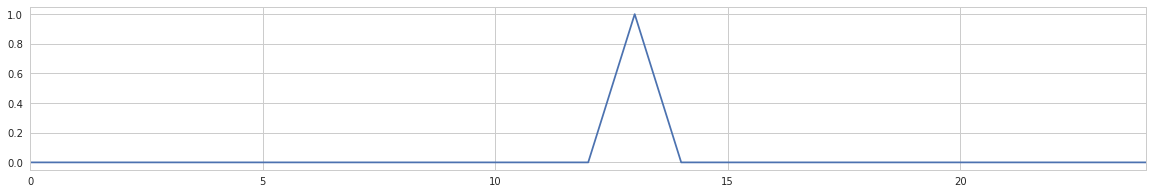

In [34]:
index = 0
pred_df.loc[index:index+24]['swell'].plot()

In [35]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
0        600 non-null int64
1        600 non-null float64
swell    600 non-null int64
dtypes: float64(1), int64(2)
memory usage: 14.1 KB


In [36]:
test['pred'] = pred_df['swell'].tolist()

In [37]:
index=24
test.iloc[index:index+24].T

hour,2017121007,2017121008,2017121009,2017121010,2017121011,2017121012,2017121013,2017121014,2017121015,2017121016,...,2017121021,2017121022,2017121023,2017121100,2017121101,2017121102,2017121103,2017121104,2017121105,2017121106
index,34464.0,34465.0,34466.0,34467.0,34468.0,34469.0,34470.0,34471.0,34472.0,34473.0,...,34478.0,34479.0,34480.0,34481.0,34482.0,34483.0,34484.0,34485.0,34486.0,34487.0
22105_파주기(sec),6.4,5.8,5.3,3.6,3.4,4.3,4.3,4.6,4.9,4.6,...,4.9,4.9,5.3,7.1,8.0,8.0,7.1,8.0,8.0,8.0
swell(t+1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pred,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
eval_metric = evaluation(df['swell(t+1)'].apply(output_change))

In [39]:
scores = []
for day in range(25):
    st = day*24
    print(st)
    scores.append(eval_metric.evaluate(test['pred'][st:st + 24]))

print(scores)

0
 1    23
-1     1
dtype: int64
24
1    24
dtype: int64
48
1    24
dtype: int64
72
1    24
dtype: int64
96
-2    12
 1    12
dtype: int64
120
1    24
dtype: int64
144
 2    18
 0     3
-1     3
dtype: int64
168
 2    11
 0     8
-2     5
dtype: int64
192
 2    12
 0     6
-2     5
 1     1
dtype: int64
216
-1    21
 1     3
dtype: int64
240
 1    20
-1     4
dtype: int64
264
2    22
0     2
dtype: int64
288
-1    15
 1     9
dtype: int64
312
1    24
dtype: int64
336
 1    23
-1     1
dtype: int64
360
1    24
dtype: int64
384
2    19
0     5
dtype: int64
408
 1    23
-1     1
dtype: int64
432
2    13
0     9
1     2
dtype: int64
456
1    24
dtype: int64
480
-1    14
 1    10
dtype: int64
504
1    11
2     8
0     5
dtype: int64
528
 0    10
 2     7
-2     6
 1     1
dtype: int64
552
1    24
dtype: int64
576
-2    21
 1     3
dtype: int64
[22, 24, 24, 24, -12, 24, 33, 12, 15, -18, 16, 44, -6, 24, 22, 24, 38, 22, 28, 24, -4, 27, 3, 24, -39]


In [40]:
np.sum(scores)

395